In [12]:
import pandas as pd
df = pd.read_csv('/content/daily_weather.csv')
df.tail() #28>0 28<1



,number,air_pressure_9am,air_temp_9am,avg_wind_direction_9am,avg_wind_speed_9am,max_wind_direction_9am,max_wind_speed_9am,rain_accumulation_9am,rain_duration_9am,relative_humidity_9am,relative_humidity_3pm
1090,1090,918.90,63.104,192.9,3.869906,207.3,5.212070,0.0,0.0,26.02,38.18
1091,1091,918.71,49.568,241.6,1.811921,227.4,2.371156,0.0,0.0,90.35,73.34
1092,1092,916.60,71.096,189.3,3.064608,200.8,3.892276,0.0,0.0,45.59,52.31
1093,1093,912.60,58.406,172.7,3.825167,189.1,4.764682,0.0,0.0,64.84,58.28
1094,1094,921.53,77.702,97.1,3.265932,125.9,4.451511,0.0,0.0,14.56,15.10


In [13]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1095 entries, 0 to 1094
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   number                  1095 non-null   int64  
 1   air_pressure_9am        1092 non-null   float64
 2   air_temp_9am            1090 non-null   float64
 3   avg_wind_direction_9am  1091 non-null   float64
 4   avg_wind_speed_9am      1092 non-null   float64
 5   max_wind_direction_9am  1092 non-null   float64
 6   max_wind_speed_9am      1091 non-null   float64
 7   rain_accumulation_9am   1089 non-null   float64
 8   rain_duration_9am       1092 non-null   float64
 9   relative_humidity_9am   1095 non-null   float64
 10  relative_humidity_3pm   1095 non-null   float64
dtypes: float64(10), int64(1)
memory usage: 94.2 KB


In [14]:
df.isna().sum()


,0
number,0
air_pressure_9am,3
air_temp_9am,5
avg_wind_direction_9am,4
avg_wind_speed_9am,3
max_wind_direction_9am,3
max_wind_speed_9am,4
rain_accumulation_9am,6
rain_duration_9am,3
relative_humidity_9am,0


In [15]:
df= df.dropna()

In [16]:
df.isna().sum()

,0
number,0
air_pressure_9am,0
air_temp_9am,0
avg_wind_direction_9am,0
avg_wind_speed_9am,0
max_wind_direction_9am,0
max_wind_speed_9am,0
rain_accumulation_9am,0
rain_duration_9am,0
relative_humidity_9am,0


In [17]:
df=df.drop('number', axis=1)

In [18]:
df['relative_humidity_3pm'].head()

,relative_humidity_3pm
0,36.160000
1,19.426597
2,14.460000
3,12.742547
4,76.740000


In [19]:
for index in df.index:
    if df.loc[index, 'relative_humidity_3pm'] > 28:
        df.loc[index, 'relative_humidity_3pm'] = 1
    else:
        df.loc[index, 'relative_humidity_3pm'] = 0

df['relative_humidity_3pm'].head()

,relative_humidity_3pm
0,1.0
1,0.0
2,0.0
3,0.0
4,1.0


In [20]:
df.head()

,air_pressure_9am,air_temp_9am,avg_wind_direction_9am,avg_wind_speed_9am,max_wind_direction_9am,max_wind_speed_9am,rain_accumulation_9am,rain_duration_9am,relative_humidity_9am,relative_humidity_3pm
0,918.060000,74.822000,271.100000,2.080354,295.400000,2.863283,0.0,0.0,42.420000,1.0
1,917.347688,71.403843,101.935179,2.443009,140.471548,3.533324,0.0,0.0,24.328697,0.0
2,923.040000,60.638000,51.000000,17.067852,63.700000,22.100967,0.0,20.0,8.900000,0.0
3,920.502751,70.138895,198.832133,4.337363,211.203341,5.190045,0.0,0.0,12.189102,0.0
4,921.160000,44.294000,277.800000,1.856660,136.500000,2.863283,8.9,14730.0,92.410000,1.0


In [21]:
weather_target = df[['relative_humidity_3pm']]
print(weather_target.head())
weather_features = df.drop('relative_humidity_3pm', axis=1)

print(weather_features.head())


   relative_humidity_3pm
0                    1.0
1                    0.0
2                    0.0
3                    0.0
4                    1.0
   air_pressure_9am  air_temp_9am  avg_wind_direction_9am  avg_wind_speed_9am  \
0        918.060000     74.822000              271.100000            2.080354   
1        917.347688     71.403843              101.935179            2.443009   
2        923.040000     60.638000               51.000000           17.067852   
3        920.502751     70.138895              198.832133            4.337363   
4        921.160000     44.294000              277.800000            1.856660   

   max_wind_direction_9am  max_wind_speed_9am  rain_accumulation_9am  \
0              295.400000            2.863283                    0.0   
1              140.471548            3.533324                    0.0   
2               63.700000           22.100967                    0.0   
3              211.203341            5.190045                    0.0   
4  

In [22]:
for column in weather_features.columns:
  mean = weather_features[column].mean()
  for index in weather_features.index:
    if weather_features.loc[index, column] > mean:
      weather_features.loc[index, column] = 1
    else:
      weather_features.loc[index, column] = 0

In [23]:
weather_features.head()

,air_pressure_9am,air_temp_9am,avg_wind_direction_9am,avg_wind_speed_9am,max_wind_direction_9am,max_wind_speed_9am,rain_accumulation_9am,rain_duration_9am,relative_humidity_9am
0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
3,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
4,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0


In [24]:
clf = tree.DecisionTreeClassifier(max_depth=3)
clf = clf.fit(weather_features, weather_target)

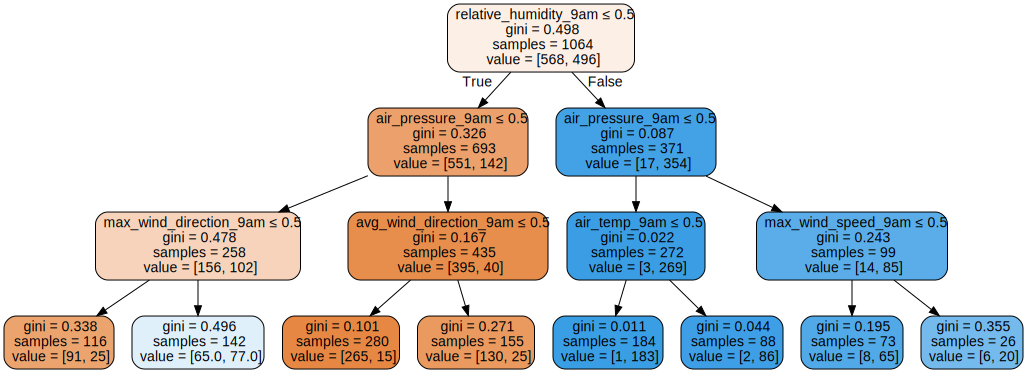

In [25]:
# Get the correct feature names from the weather_features DataFrame
dot_data  = tree.export_graphviz(clf, out_file=None,
                         feature_names=weather_features.columns,
                         #class_names=weather_target,
                         filled=True, rounded=True,
                         special_characters=True)

graph = graphviz.Source(dot_data)
graph.render("weather")

graph = graphviz.Source(dot_data)
graph

In [ ]:
# Extra practice dataset Iris directly imported from sklearnlibrary

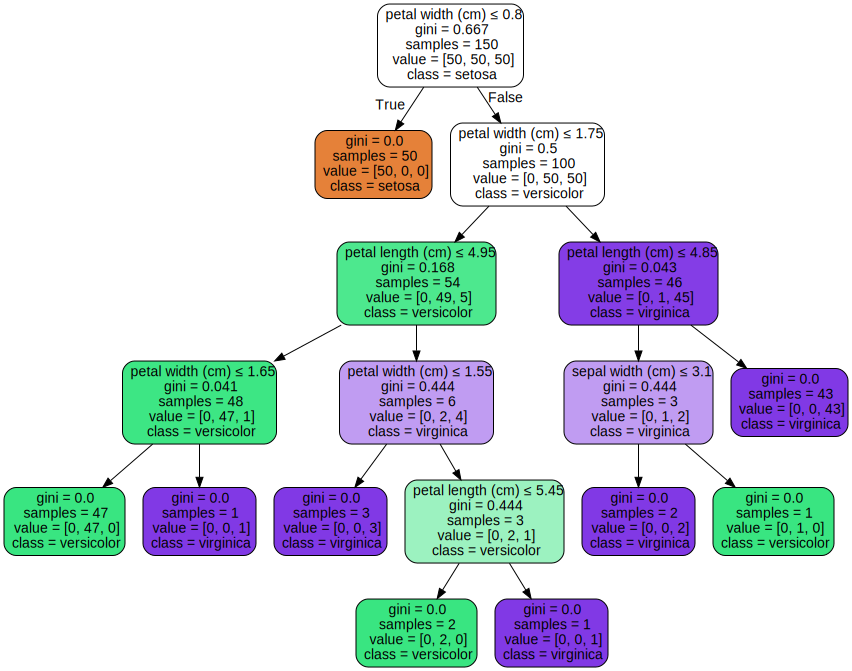

In [9]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import numpy as np
from sklearn import tree
import graphviz

iris = load_iris()

clf = tree.DecisionTreeClassifier()
clf = clf.fit(iris.data, iris.target)

dot_data = tree.export_graphviz(clf, out_file=None)
graph = graphviz.Source(dot_data)
graph.render("iris")

dot_data  = tree.export_graphviz(clf, out_file=None,
                         feature_names=iris.feature_names,
                         class_names=iris.target_names,
                         filled=True, rounded=True,
                         special_characters=True)
graph = graphviz.Source(dot_data)
graph